In [1]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
data = data
target = target

X = data
Y = target.reshape((506, 1))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [3]:
model = Sequential([ Dense(units=13, activation="sigmoid"),
                   Dense(units=8, activation="sigmoid"),
                    Dense(units=5, activation="sigmoid"),
                     Dense(units=1)
                ])

In [5]:
model.compile(loss="mse", optimizer=SGD(learning_rate=0.01))
h = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
12/12 [==============================] - 1s 16ms/step - loss: 427.8763 - val_loss: 209.6234
Epoch 2/20
12/12 [==============================] - 0s 3ms/step - loss: 145.2420 - val_loss: 91.9679
Epoch 3/20
12/12 [==============================] - 0s 4ms/step - loss: 89.9284 - val_loss: 81.5937
Epoch 4/20
12/12 [==============================] - 0s 5ms/step - loss: 85.4271 - val_loss: 81.1869
Epoch 5/20
12/12 [==============================] - 0s 3ms/step - loss: 84.6086 - val_loss: 80.9124
Epoch 6/20
12/12 [==============================] - 0s 3ms/step - loss: 84.2714 - val_loss: 80.6321
Epoch 7/20
12/12 [==============================] - 0s 3ms/step - loss: 83.8248 - val_loss: 80.1015
Epoch 8/20
12/12 [==============================] - 0s 3ms/step - loss: 82.9021 - val_loss: 79.1461
Epoch 9/20
12/12 [==============================] - 0s 3ms/step - loss: 81.3680 - val_loss: 78.2554
Epoch 10/20
12/12 [==============================] - 0s 3ms/step - loss: 79.3132 - val_loss: 76.

In [7]:
h.history

{'loss': [427.8763122558594,
  145.24200439453125,
  89.92835998535156,
  85.42707824707031,
  84.60857391357422,
  84.27144622802734,
  83.82484436035156,
  82.90206909179688,
  81.36800384521484,
  79.313232421875,
  75.60820770263672,
  69.26409149169922,
  61.11091613769531,
  52.5905876159668,
  45.56661605834961,
  39.436927795410156,
  34.628944396972656,
  31.485441207885742,
  28.526336669921875,
  26.331907272338867],
 'val_loss': [209.62344360351562,
  91.9679183959961,
  81.59371185302734,
  81.18692779541016,
  80.91238403320312,
  80.6321029663086,
  80.10151672363281,
  79.14611053466797,
  78.25540924072266,
  76.09233093261719,
  72.56312561035156,
  67.96646118164062,
  62.94077682495117,
  58.47953796386719,
  53.46895980834961,
  49.557743072509766,
  43.59303665161133,
  39.73548126220703,
  37.39399337768555,
  36.08003234863281]}

In [8]:
import matplotlib.pyplot as plt

def plot_learning_curve(history):


  plt.plot(list(range(len(history['loss']))), history['loss'])
  plt.plot(list(range(len(history['val_loss']))), history['val_loss'])
  plt.xlabel('Epochs')
  plt.ylabel("Loss")
  plt.title("Learning Curve")
  plt.show()

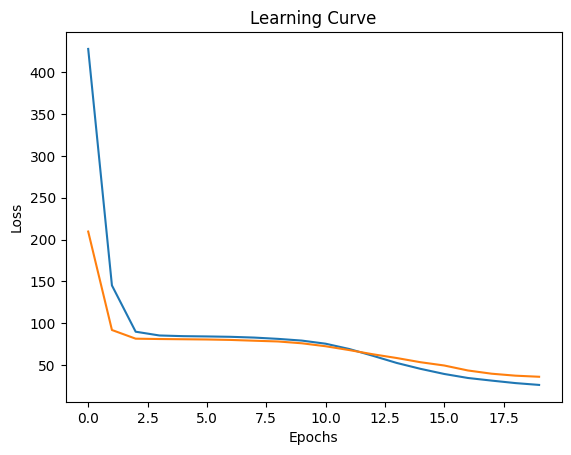

In [9]:
plot_learning_curve(h.history)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 8)                 112       
                                                                 
 dense_2 (Dense)             (None, 5)                 45        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 345
Trainable params: 345
Non-trainable params: 0
_________________________________________________________________


In [11]:
13*13 + 13

182

In [12]:
13*8 + 8

112

In [13]:
model.save('model.h5')

In [14]:
from tensorflow.keras.models import load_model

In [15]:
new_model = load_model('model.h5')

In [16]:
new_model

In [17]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 8)                 112       
                                                                 
 dense_2 (Dense)             (None, 5)                 45        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 345
Trainable params: 345
Non-trainable params: 0
_________________________________________________________________


In [18]:
P = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [20]:
P.shape

(127, 1)

In [21]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 36.0800


36.08003234863281